In [1]:
import pandas as pd # pandas for data manipulation
import numpy as np # math calculus library
import matplotlib.pyplot as plt # creating tables and plots
import seaborn as sns
from sklearn.linear_model import LogisticRegression # AI Library

C:\Users\danie\AppData\Local\Temp\ipykernel_21848\1651266146.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # pandas for data manipulation


In [2]:
iris = pd.read_csv("../datasets/Iris/Iris.csv")
print('Size of dataset')
print(iris.shape)

Size of dataset
(150, 6)


In [4]:
print("data structure")
print(iris.head())

data structure
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
#Descriptions
print("Database description")
print(iris.describe())

Database description
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


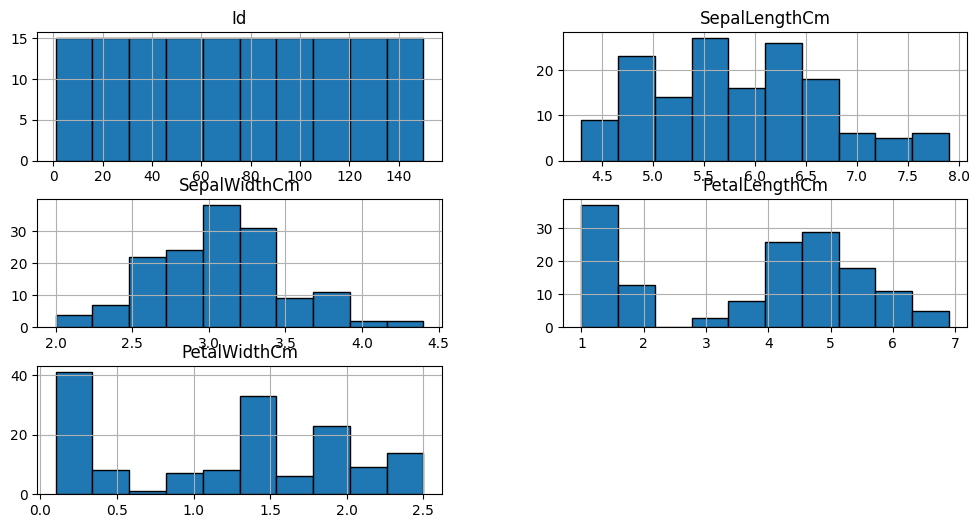

In [7]:
iris.hist(edgecolor='black')
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

c:\Users\danie\OneDrive - Universidad Tecnológica de Panamá\Repositories\Machine_Learing_Intro\env\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


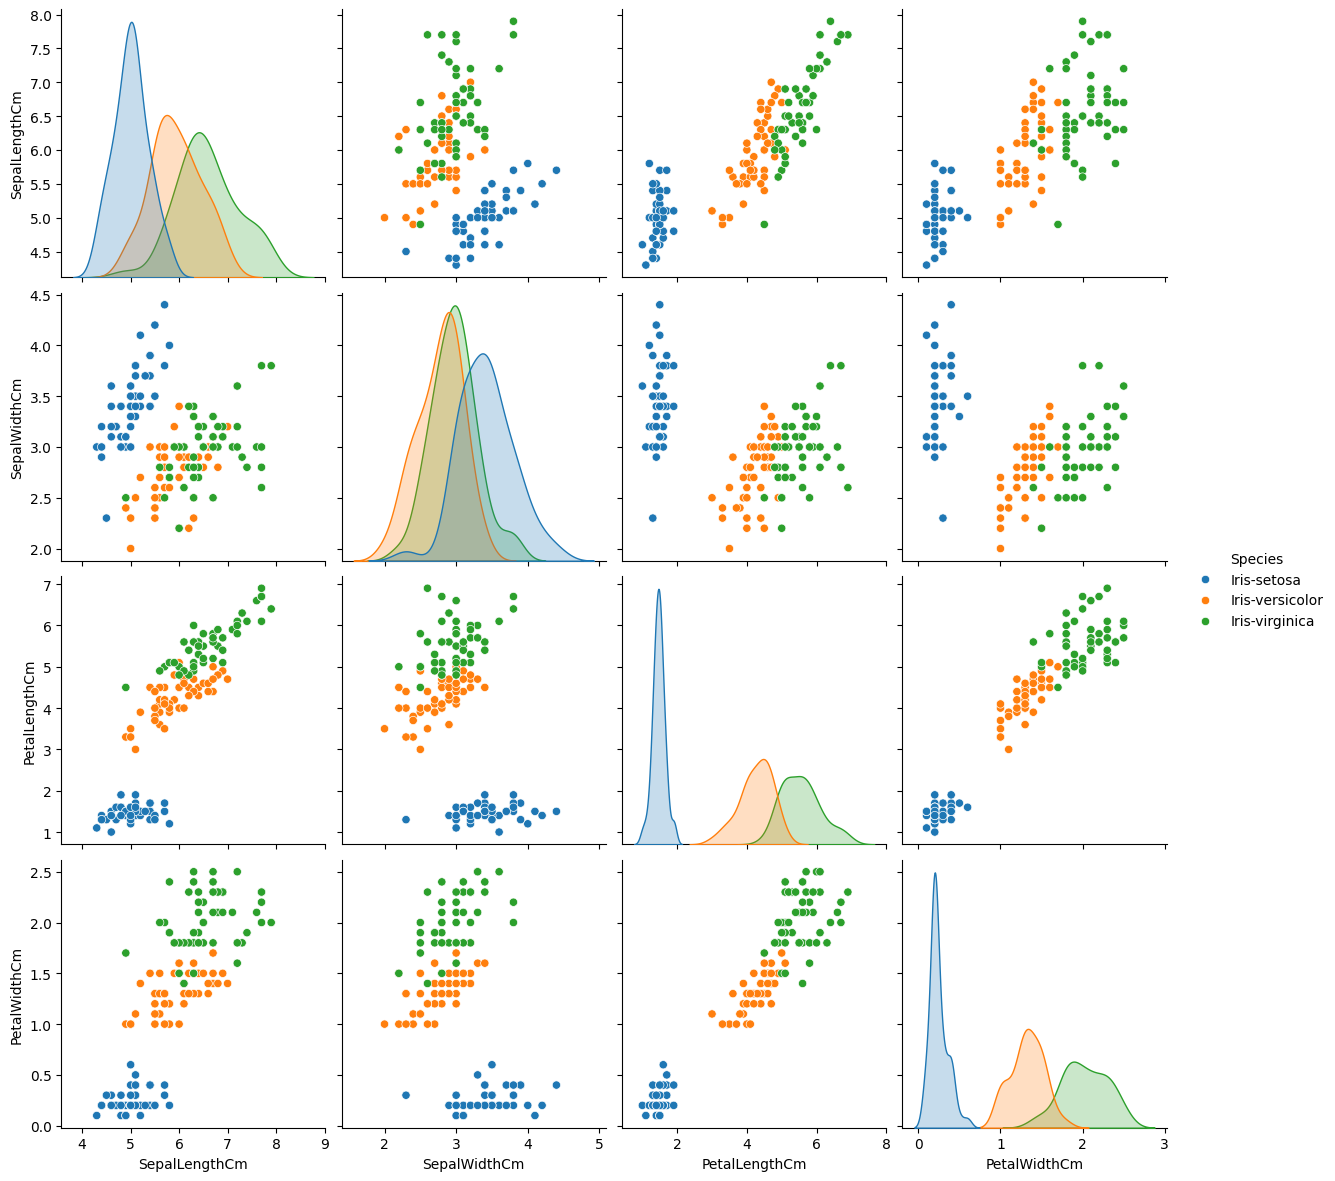

In [9]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

<Axes: >

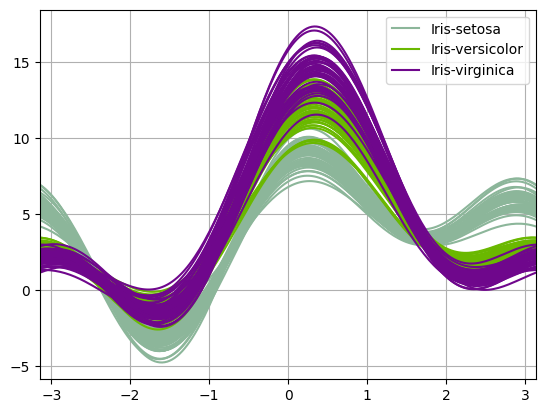

In [11]:
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")


<Axes: >

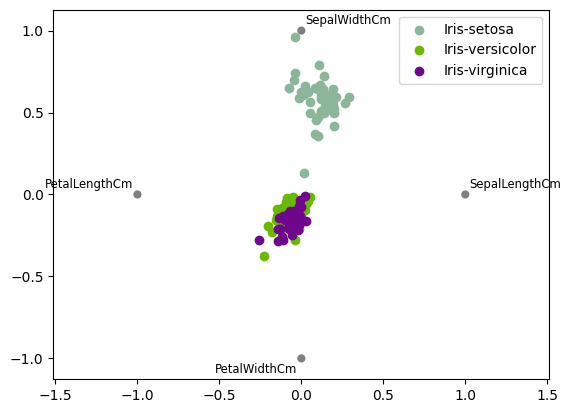

In [12]:
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

## Machine learning model


In [18]:
# Separate data groups in train set and test set
from sklearn import model_selection
array = iris.drop("Id",axis=1).values

X = array[:,0:4] # Data
Y = array[:,4] # Ground truth

val_size = 0.2
seed = 7 # Choose a random number in our data base

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X,
    Y,
    test_size=val_size,
    random_state=seed)


In [20]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [52]:
# Logistic regression
LR = LogisticRegression(penalty='l1',C=0.50,solver='saga',n_jobs=8,l1_ratio=0.75)
LR.fit(X_train, Y_train)

c:\Users\danie\OneDrive - Universidad Tecnológica de Panamá\Repositories\Machine_Learing_Intro\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\danie\OneDrive - Universidad Tecnológica de Panamá\Repositories\Machine_Learing_Intro\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.5, l1_ratio=0.75, n_jobs=8, penalty='l1', solver='saga')

In [53]:
from sklearn.metrics import accuracy_score
Y_pred = LR.predict(X_test)

print('Accuracy of Logistic regression: {}'.format(accuracy_score(Y_test,Y_pred)))

Accuracy of Logistic regression: 0.9333333333333333


In [54]:
Y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)